In [189]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
encode = LabelEncoder()

In [190]:
df = pd.read_csv("Online Retail.csv")

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [192]:
df = df.dropna(subset=["CustomerID"])

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [194]:
df.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [195]:
df = df.loc[df["Quantity"] > 0 ]

In [196]:
df.shape

(397924, 8)

In [197]:
df["Sales"] = (df["Quantity"] * df["UnitPrice"]).values

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
 8   Sales        397924 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.4+ MB


In [199]:
## Conver date from Object Type to Date type
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Sales        397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


# RFM - Recency, Frequency and Monetary

#### 1. Monetary

In [201]:
df.shape

(397924, 9)

In [202]:
df.CustomerID.unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [203]:
Monetry  = df.groupby("CustomerID").Sales.sum()
Monetry= Monetry.reset_index()
Monetry

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


#### 1. Frequency Value

In [204]:
df.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales'],
      dtype='object')

In [205]:
frequency = df.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


#### Recency

In [206]:
MaxDate = max(df.InvoiceDate) + pd.DateOffset(days = 1)

In [207]:
MaxDate

Timestamp('2011-12-11 17:19:00')

In [208]:
df["Difference"] = MaxDate - df.InvoiceDate

In [209]:
df.Difference

0        698 days 08:53:00
1        698 days 08:53:00
2        698 days 08:53:00
3        698 days 08:53:00
4        698 days 08:53:00
                ...       
541904    90 days 04:29:00
541905    90 days 04:29:00
541906    90 days 04:29:00
541907    90 days 04:29:00
541908    90 days 04:29:00
Name: Difference, Length: 397924, dtype: timedelta64[ns]

In [211]:
Recency = df.groupby("CustomerID").Difference.min()
Recency = Recency.reset_index()
Recency

,CustomerID,Difference
0,12346.0,327 days 07:18:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00
...,...,...
4334,18280.0,161 days 07:27:00
4335,18281.0,5 days 06:26:00
4336,18282.0,217 days 03:44:00
4337,18283.0,11 days 04:20:00


In [212]:
Recency.Difference = Recency.Difference.dt.days
Recency

,CustomerID,Difference
0,12346.0,327
1,12347.0,41
2,12348.0,77
3,12349.0,20
4,12350.0,312
...,...,...
4334,18280.0,161
4335,18281.0,5
4336,18282.0,217
4337,18283.0,11


#### merging all

In [213]:
MF = Monetry.merge(frequency,on="CustomerID")

In [214]:
RFM = MF.merge(Recency, on="CustomerID")

In [215]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Sales       4339 non-null   float64
 2   InvoiceNo   4339 non-null   int64  
 3   Difference  4339 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 169.5 KB


In [161]:
RFM.colums = ["CustomerID", "Sale", "Frequency", "Difference"]

In [162]:
RFM

,CustomerID,Sale,InvoiceNo,Difference
0,12346.0,77183.60,1,327
1,12347.0,4310.00,182,41
2,12348.0,1797.24,31,77
3,12349.0,1757.55,73,20
4,12350.0,334.40,17,312
...,...,...,...,...
4334,18280.0,180.60,10,161
4335,18281.0,80.82,7,5
4336,18282.0,178.05,12,217
4337,18283.0,2094.88,756,11


In [163]:
## standard scaler value

In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [217]:
### Out - (X-mean)/std(date)

In [218]:
RFM_New = scaler.fit_transform(RFM)

# Apply K-mean with some K

In [219]:
from sklearn.cluster import KMeans

In [220]:
SSD = []
K = []
for i in range(2, 15):
    model = KMeans(n_clusters=i)
    model.fit(RFM_New)
    SSD.append(model.inertia_)
    K.append(i)

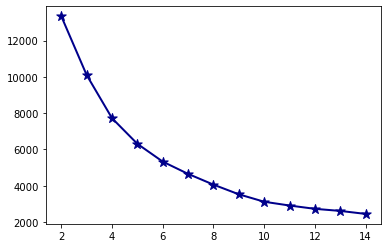

In [221]:
plt.plot(K, SSD, c="darkblue", lw=2)
plt.scatter(K, SSD, marker="*", s=100, c="darkblue")
plt.show()

In [222]:
model = KMeans(n_clusters=5)
ClusterId = model.fit_predict(RFM_New)

In [223]:
RFM["ClusterId"] = ClusterId

In [224]:
RFM.ClusterId.unique()

array([0, 4, 3, 2, 1])

In [225]:
RFM.head()

,CustomerID,Sales,InvoiceNo,Difference,ClusterId
0,12346.0,77183.60,1,327,0
1,12347.0,4310.00,182,41,0
2,12348.0,1797.24,31,77,0
3,12349.0,1757.55,73,20,0
4,12350.0,334.40,17,312,4


In [226]:
All_Sales = RFM.groupby("ClusterId").Sales.mean()
All_Frequency = RFM.groupby("ClusterId").InvoiceNo.mean()
All_Recency = RFM.groupby("ClusterId").Difference.mean()

In [230]:
final_data = pd.DataFrame({
    "Sales": All_Sales,
    "Frequency": All_Frequency,
    "Recency": All_Recency 
})

In [231]:
### plot pie plot for all_data

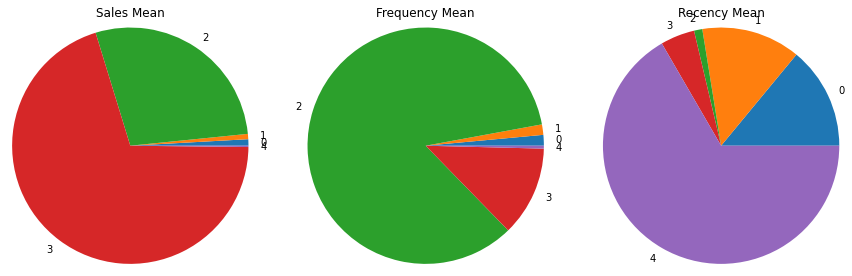

In [233]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1, 3, 1)
plt.title("Sales Mean")
ax.pie(final_data.Sales, labels=[0,1,2,3,4], radius=1.2)

ax = fig.add_subplot(1, 3, 2)
plt.title("Frequency Mean")
ax.pie(final_data.Frequency, labels=[0,1,2,3,4], radius=1.2)

ax = fig.add_subplot(1, 3, 3)
plt.title("Recency Mean")
ax.pie(final_data.Recency, labels=[0,1,2,3,4], radius=1.2)

plt.show()

In [234]:
df2 = RFM[RFM.ClusterId == 1]

In [235]:
df2

,CustomerID,Sales,InvoiceNo,Difference,ClusterId
2147,15267.0,1717.36,11,1,1
2148,15269.0,408.80,2,25,1
2151,15272.0,721.94,63,59,1
2152,15274.0,716.57,47,20,1
2155,15277.0,255.90,12,48,1
...,...,...,...,...,...
4334,18280.0,180.60,10,161,1
4335,18281.0,80.82,7,5,1
4336,18282.0,178.05,12,217,1
4337,18283.0,2094.88,756,11,1


In [ ]:
df2.